In [1]:
import pathlib
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from visualisation_utils import plot_colormap_from_dataset, \
    plot_wind_components_from_dataset, plot_wind_components_from_different_datasets, HigherResPlateCarree

data_path = pathlib.Path("../data")
warnings.filterwarnings('ignore')

# ERA5 Data

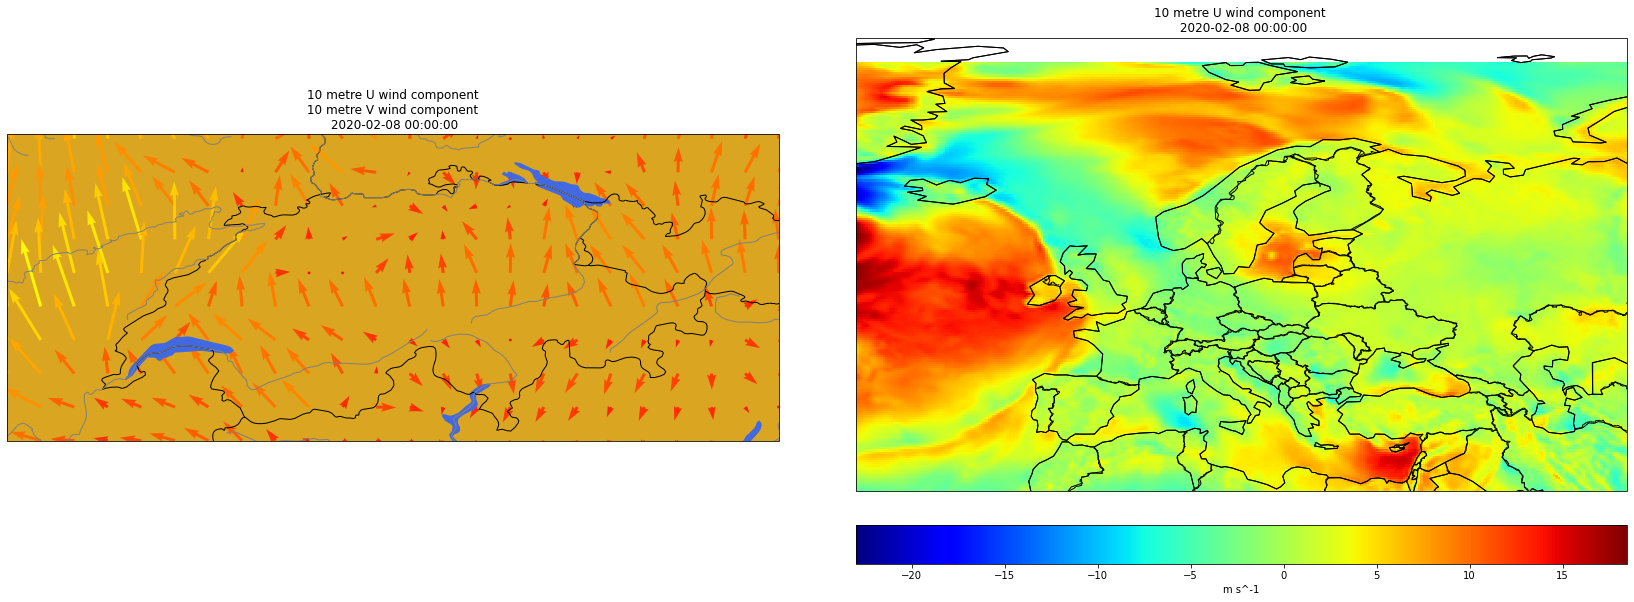

In [8]:
file = data_path.glob('ERA5/*.nc').__next__()
data = Dataset(file, mode='r')  # read the data
range_long = (5.1, 11.2)
range_lat = (45.7, 48.1)

subplot_kw = {'projection': HigherResPlateCarree()}
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw=subplot_kw, figsize=(25,12.5))
fig.subplots_adjust(wspace=0.1, left=0.05, right=0.95)
plot_wind_components_from_dataset(data, 0, 'u10', 'v10',
                                  range_lon=range_long, range_lat=range_lat,
                                  ax=ax1)
plot_colormap_from_dataset(data, 0, 'u10', ax=ax2)
fig.show()

# NASA-GISS-E2-R CMIP5 RCP4.5 Data

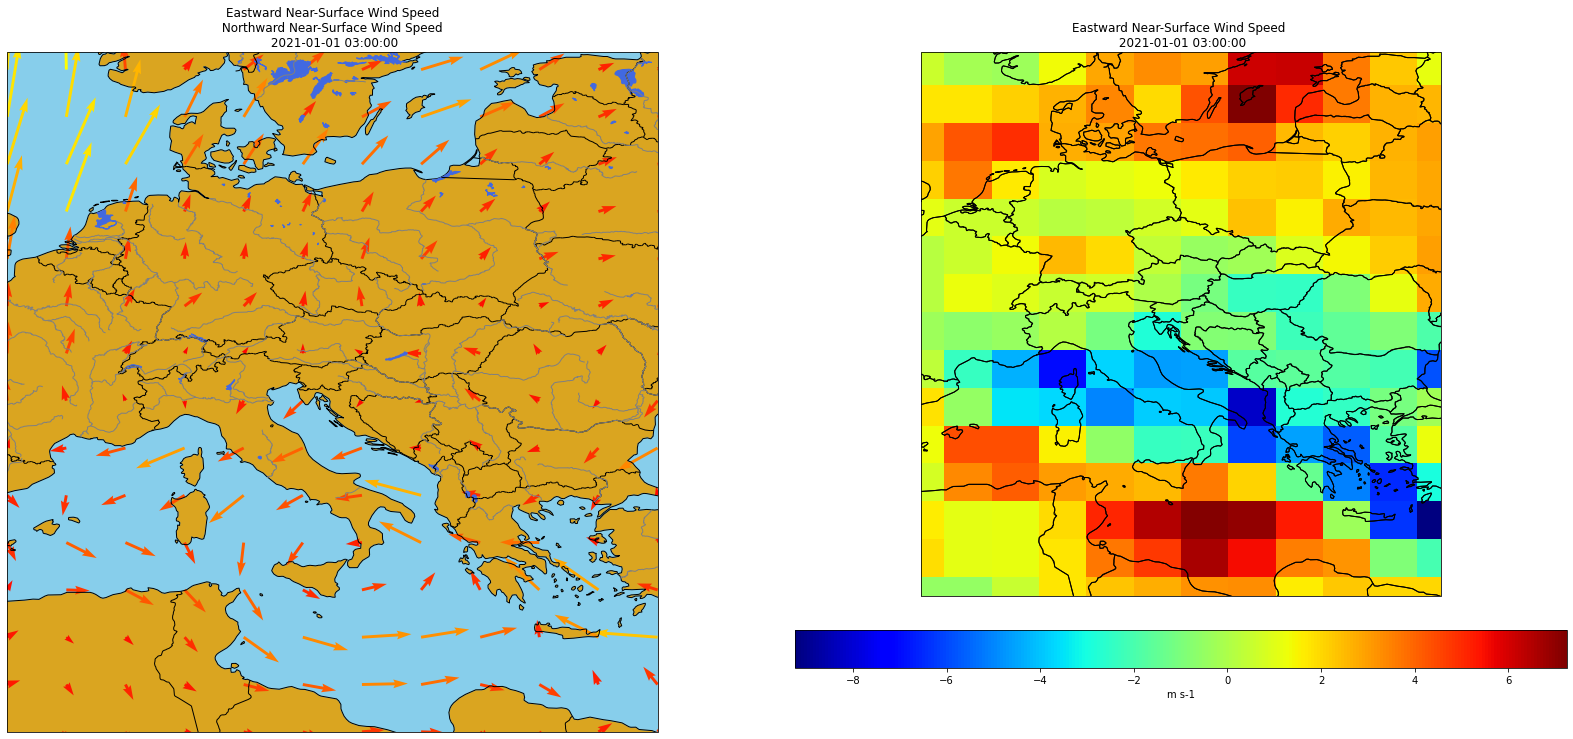

In [9]:
file_uas = data_path.glob("NASA-GISS-E2-R/rcp45/uas*.nc").__next__()
d1 = Dataset(file_uas, mode='r')  # read the data
file_vas = data_path.glob("NASA-GISS-E2-R/rcp45/vas*.nc").__next__()
d2 = Dataset(file_vas, mode='r')

range_long = (0 , 30)
range_lat = (30, 60)

subplot_kw = {'projection': HigherResPlateCarree()}
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw=subplot_kw, figsize=(25, 12.5))
fig.subplots_adjust(wspace=0.1, left=0.05, right=0.95)
plot_wind_components_from_different_datasets(d1, d2, 0, 'uas', 'vas',
                                             range_lon=range_long,
                                             range_lat=range_lat,
                                             ax=ax1)
plot_colormap_from_dataset(d1, 0, 'uas', range_lon=range_long,
                                             range_lat=range_lat, ax=ax2)
fig.show()


# MeteoSwiss Observations

In [2]:
file_obs = pathlib.Path(data_path, 'MS_observations/wind_2016_2021_processed.csv')
obs = pd.read_csv(file_obs)
obs.head(10)

,Unnamed: 0,station,datetime_raw,wind_speed_mps,wind_direction_degrees,theta_radians,u10,v10,date,datetime
0,0,ALT,2016010100,1.2,175.0,3.054326,1.045869e-01,-1.195434,2016-01-01,2016-01-01 00:00:00
1,1,ALT,2016010101,0.6,162.0,2.827433,1.854102e-01,-0.570634,2016-01-01,2016-01-01 01:00:00
2,2,ALT,2016010102,0.4,180.0,3.141593,4.898587e-17,-0.400000,2016-01-01,2016-01-01 02:00:00
3,3,ALT,2016010103,0.8,150.0,2.617994,4.000000e-01,-0.692820,2016-01-01,2016-01-01 03:00:00
4,4,ALT,2016010104,0.8,157.0,2.740167,3.125849e-01,-0.736404,2016-01-01,2016-01-01 04:00:00
5,5,ALT,2016010105,1.3,171.0,2.984513,2.033648e-01,-1.283995,2016-01-01,2016-01-01 05:00:00
6,6,ALT,2016010106,1.4,117.0,2.042035,1.247409e+00,-0.635587,2016-01-01,2016-01-01 06:00:00
7,7,ALT,2016010107,0.9,180.0,3.141593,1.102182e-16,-0.900000,2016-01-01,2016-01-01 07:00:00
8,8,ALT,2016010108,0.7,149.0,2.600541,3.605267e-01,-0.600017,2016-01-01,2016-01-01 08:00:00
9,9,ALT,2016010109,0.6,146.0,2.548181,3.355157e-01,-0.497423,2016-01-01,2016-01-01 09:00:00


(array([0.00928077, 0.04504279, 0.09330242, 0.34333452, 0.40349111,
        0.33455026, 0.30599272, 0.16179017, 0.02741871, 0.00201378]),
 array([-2.30258509, -1.72328373, -1.14398237, -0.56468101,  0.01462035,
         0.59392171,  1.17322307,  1.75252443,  2.33182579,  2.91112715,
         3.49042852]),
 <BarContainer object of 10 artists>)

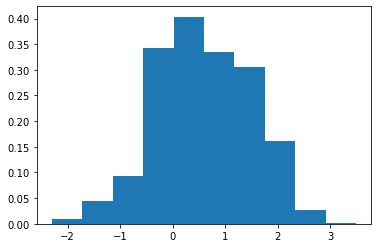

In [3]:
import numpy as np
plt.hist(np.log(obs[obs['wind_speed_mps']>0]['wind_speed_mps']), density=True)

<AxesSubplot:xlabel='station'>

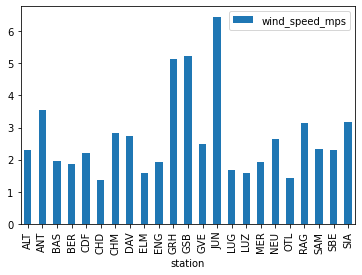

In [4]:
obs.groupby('station').agg({'wind_speed_mps':'mean'}).plot(kind='bar')